In [9]:
import pandas as pd
df_headbrain=pd.read_csv('headbrain.csv')


In [4]:
df_headbrain.head()

,Gender,Age Range,Head Size(cm^3),Brain Weight(grams)
0,1,1,4512,1530
1,1,1,3738,1297
2,1,1,4261,1335
3,1,1,3777,1282
4,1,1,4177,1590


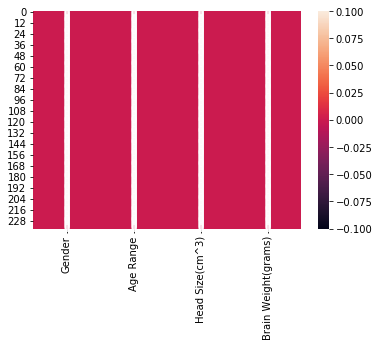

In [5]:
#Lets check whether the null values are present in the dataset or not using heatmap
import seaborn as sns
import matplotlib.pyplot as plt
sns.heatmap(df_headbrain.isnull(),annot=True)
plt.show()

In [6]:
#lets check the null values without using visualisation
df_headbrain.isnull().sum()

Gender                 0
Age Range              0
Head Size(cm^3)        0
Brain Weight(grams)    0
dtype: int64

In [10]:
#lets check whether their are outliers present in the dataset or not
from scipy.stats import zscore
z_score=abs(zscore(df_headbrain))
print(df_headbrain.shape)
df_headbrain_final=df_headbrain.loc[(z_score<3).all(axis=1)]
print(df_headbrain_final.shape)

(237, 4)
(236, 4)


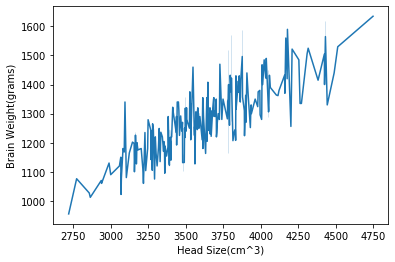

In [11]:
#lets check the how brain weight(grams) is changing with respest to Head size(cm^3)
sns.lineplot(x=df_headbrain['Head Size(cm^3)'],y=df_headbrain['Brain Weight(grams)'],data=df_headbrain)
plt.show()
#The below graph clearly show that with increase in head size their is increase in brain weight too

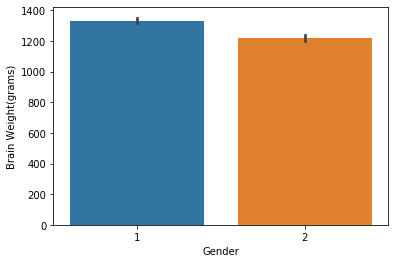

In [12]:
#lets check what is average brain size according to gender
sns.barplot(x=df_headbrain['Gender'],y=df_headbrain['Brain Weight(grams)'],data=df_headbrain)
plt.show()

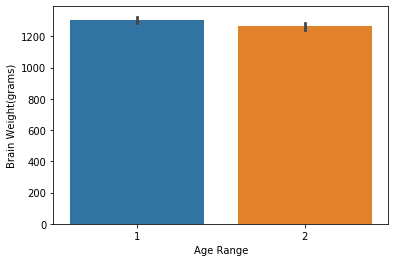

In [13]:
#lets check what is average brain size according to age range
sns.barplot(x=df_headbrain['Age Range'],y=df_headbrain['Brain Weight(grams)'],data=df_headbrain)
plt.show()

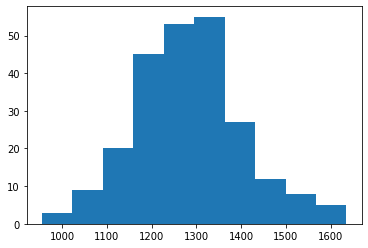

In [14]:
#lets draw histogram for brain weight
plt.hist(x='Brain Weight(grams)',bins=10,data=df_headbrain)
plt.show()
#we can say it show almost normal distribution based on below output

In [15]:
#let check skewness of the dataset
df_headbrain.skew()
#Below show accept level of skewness

Gender                 0.265554
Age Range             -0.144748
Head Size(cm^3)        0.238807
Brain Weight(grams)    0.265478
dtype: float64

In [16]:
#Now let seprate input and output variable to be used for the linear regression problem
x=df_headbrain[['Head Size(cm^3)']]
y=df_headbrain[['Brain Weight(grams)']]

In [19]:
# scaling down using standard scaler
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
x=sc.fit_transform(x)


In [22]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn import linear_model 
max_r_score=0;
for r_state in range(42,101):
    x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=r_state,test_size=0.20)
    regr=linear_model.LinearRegression()
    regr.fit(x_train,y_train)
    y_pred=regr.predict(x_test)
    r2_scr=r2_score(y_test,y_pred)
    #print('r2_score corresponding to random state: ',r_state,"is:",r2_scr)
    if r2_scr>max_r_score:
        max_r_score=r2_scr
        final_r_state=r_state
print('\n\nmax r2 score corresponding to random state:',final_r_state,"is",max_r_score)



max r2 score corresponding to random state: 50 is 0.7683161771318534


In [23]:
#lets do the cross validation
from sklearn.model_selection import cross_val_score
cross_val_score(linear_model.LinearRegression(),x,y,cv=5,scoring='r2').mean()
#the below cross validation score is less and it show that we further need to improve our model using more data

0.4936984443261272

In [24]:
#since maximum r2 score is comming around random state 50 we will use that to create our final model
x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=50,test_size=0.20)
lr=linear_model.LinearRegression()
lr.fit(x_train,y_train)
y_pred=regr.predict(x_test)

In [25]:
#lets evaluate RMSE and r2 score using sklearn library
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
import numpy as np
print("r2 score is : ",r2_score(y_test,y_pred))
print("RMSE is : ",np.sqrt(mean_squared_error(y_test,y_pred)))

r2 score is :  0.7702775225720772
RMSE is :  60.111666339980594


In [26]:
#lets save the model as a pickle in a file
from sklearn.externals import joblib
# Save the model as a pickle in a file
joblib.dump(lr,'lr_headbrain_model.csv')

C:\Users\HIMANSHU\anaconda3\lib\site-packages\sklearn\externals\joblib\__init__.py:15: FutureWarning: sklearn.externals.joblib is deprecated in 0.21 and will be removed in 0.23. Please import this functionality directly from joblib, which can be installed with: pip install joblib. If this warning is raised when loading pickled models, you may need to re-serialize those models with scikit-learn 0.21+.
  warnings.warn(msg, category=FutureWarning)


['lr_headbrain_model.csv']

In [27]:
model=joblib.load('lr_headbrain_model.csv')

In [28]:
model.predict(x_test)

array([[1301.16753506],
       [1248.11507006],
       [1221.58883756],
       [1346.23637669],
       [1269.49057781],
       [1203.30376467],
       [1290.35101307],
       [1332.32941985],
       [1246.82738887],
       [1206.13666329],
       [1263.82478057],
       [1288.54825941],
       [1247.08492511],
       [1193.2598514 ],
       [1392.33536327],
       [1442.8124659 ],
       [1104.40984933],
       [1212.317533  ],
       [1248.11507006],
       [1297.04695526],
       [1223.39159123],
       [1232.92043203],
       [1570.03536741],
       [1418.3465233 ],
       [1208.71202567],
       [1345.72130422],
       [1310.18130339],
       [1144.58550244],
       [1211.28738805],
       [1220.81622885],
       [1048.00941323],
       [1220.81622885],
       [1166.73361889],
       [1408.8176825 ],
       [1302.97028873],
       [1222.87651875],
       [1340.57057946],
       [1323.830724  ],
       [1486.59362633],
       [1271.03579523],
       [1263.3097081 ],
       [1085.094